In [2]:
import numpy as np
from numpy.linalg import norm
import pandas as pd

df = pd.read_csv("./yellow_cab_data/yellow_cab_data.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2022-01-01 00:17:55,2022-01-01 00:27:45,1.0,4.22,1.0,N,138,92,2,14.00,0.5,0.5,0.00,0.00,0.3,16.55,0.0,1.25
1,2,2022-01-01 00:22:03,2022-01-01 00:25:37,1.0,0.69,1.0,N,236,262,1,4.50,0.5,0.5,1.66,0.00,0.3,9.96,2.5,0.00
2,2,2022-01-01 00:52:33,2022-01-01 00:58:07,1.0,0.87,1.0,N,141,229,1,5.50,0.5,0.5,2.32,0.00,0.3,11.62,2.5,0.00
3,2,2022-01-01 00:31:12,2022-01-02 00:00:58,1.0,3.03,1.0,N,79,261,2,15.00,0.5,0.5,0.00,0.00,0.3,18.80,2.5,0.00
4,2,2022-01-01 00:05:26,2022-01-01 00:29:05,1.0,4.56,1.0,N,50,79,1,18.50,0.5,0.5,4.46,0.00,0.3,26.76,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2,2022-01-31 23:13:58,2022-01-31 23:35:37,NaN,5.58,NaN,NaN,158,262,0,24.63,0.0,0.5,2.00,0.00,0.3,29.93,NaN,NaN
149996,2,2022-01-31 23:31:00,2022-01-31 23:43:00,NaN,1.67,NaN,NaN,164,50,0,9.36,0.0,0.5,1.35,0.00,0.3,14.01,NaN,NaN
149997,2,2022-01-31 23:10:00,2022-01-31 23:20:00,NaN,2.02,NaN,NaN,170,50,0,10.40,0.0,0.5,1.46,0.00,0.3,15.16,NaN,NaN
149998,2,2022-01-31 23:53:00,2022-02-01 00:10:00,NaN,4.84,NaN,NaN,158,265,0,23.71,0.0,0.0,7.69,11.75,0.3,43.45,NaN,NaN


In [3]:
def analysis_continuous(col_vals):
    return np.nanmean(col_vals), np.nanvar(col_vals)

In [4]:
def get_meanvarvecs(df):
    return df.apply(analysis_continuous, axis=0).transpose().values

In [5]:
def cosine_similarity(vec1, vec2):
    cosine = np.dot(vec1,vec2)/(norm(vec1)*norm(vec2))
    return cosine

In [6]:
def get_similarity_score(vecs1, vecs2):
    score = 0
    for i in range(len(vecs1)):
        score += cosine_similarity(vecs1[i], vecs2[i])
    return score/len(vecs1)

In [7]:
df.columns, len(list(df.columns))

(Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
        'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
        'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
        'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
        'total_amount', 'congestion_surcharge', 'airport_fee'],
       dtype='object'),
 19)

In [8]:
def datatype(x):
    return type(x)

In [9]:
datatypes = []
for col in df.columns:
    datatypes.append(str(type(df.loc[0,col])))
datatypes

["<class 'numpy.int64'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'numpy.float64'>",
 "<class 'numpy.float64'>",
 "<class 'numpy.float64'>",
 "<class 'str'>",
 "<class 'numpy.int64'>",
 "<class 'numpy.int64'>",
 "<class 'numpy.int64'>",
 "<class 'numpy.float64'>",
 "<class 'numpy.float64'>",
 "<class 'numpy.float64'>",
 "<class 'numpy.float64'>",
 "<class 'numpy.float64'>",
 "<class 'numpy.float64'>",
 "<class 'numpy.float64'>",
 "<class 'numpy.float64'>",
 "<class 'numpy.float64'>"]

In [10]:
categ = []
for i in range(len(datatypes)):
    t = datatypes[i]
    if t == "<class 'numpy.int64'>" or t == "<class 'numpy.float64'>":
        pass
    else:    
        categ.append(df.columns[i])
categ

['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag']

In [11]:
#convert datetimes to integer values
df['tpep_pickup_float'] = pd.to_datetime(df[categ[0]]).map(pd.Timestamp.timestamp)
df['tpep_dropoff_float'] = pd.to_datetime(df[categ[1]]).map(pd.Timestamp.timestamp)

In [12]:
#convert binary store and fwd flag to int
def convert_yn(x):
    if x=="Y":
        return 1
    elif x=="N":
        return 0
    else:
        return np.nan
df['store_and_fwd_flag_bin'] = df[categ[2]].apply(convert_yn)

In [13]:
data = df.drop(categ, axis=1)
data

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_float,tpep_dropoff_float,store_and_fwd_flag_bin
0,2,1.0,4.22,1.0,138,92,2,14.00,0.5,0.5,0.00,0.00,0.3,16.55,0.0,1.25,1.640996e+09,1.640997e+09,0.0
1,2,1.0,0.69,1.0,236,262,1,4.50,0.5,0.5,1.66,0.00,0.3,9.96,2.5,0.00,1.640997e+09,1.640997e+09,0.0
2,2,1.0,0.87,1.0,141,229,1,5.50,0.5,0.5,2.32,0.00,0.3,11.62,2.5,0.00,1.640998e+09,1.640999e+09,0.0
3,2,1.0,3.03,1.0,79,261,2,15.00,0.5,0.5,0.00,0.00,0.3,18.80,2.5,0.00,1.640997e+09,1.641082e+09,0.0
4,2,1.0,4.56,1.0,50,79,1,18.50,0.5,0.5,4.46,0.00,0.3,26.76,2.5,0.00,1.640996e+09,1.640997e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2,NaN,5.58,NaN,158,262,0,24.63,0.0,0.5,2.00,0.00,0.3,29.93,NaN,NaN,1.643671e+09,1.643672e+09,NaN
149996,2,NaN,1.67,NaN,164,50,0,9.36,0.0,0.5,1.35,0.00,0.3,14.01,NaN,NaN,1.643672e+09,1.643673e+09,NaN
149997,2,NaN,2.02,NaN,170,50,0,10.40,0.0,0.5,1.46,0.00,0.3,15.16,NaN,NaN,1.643671e+09,1.643671e+09,NaN
149998,2,NaN,4.84,NaN,158,265,0,23.71,0.0,0.0,7.69,11.75,0.3,43.45,NaN,NaN,1.643673e+09,1.643674e+09,NaN


In [14]:
data.columns, len(data.columns)

(Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
        'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
        'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
        'total_amount', 'congestion_surcharge', 'airport_fee',
        'tpep_pickup_float', 'tpep_dropoff_float', 'store_and_fwd_flag_bin'],
       dtype='object'),
 19)

In [15]:
for col in data.columns:
    print(str(type(data.loc[0,col])))

<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


<h1> Approach 1: Total Differential Privacy </h1>

<h3> Algorithm 1: Total Anonymity (Dummy) </h3>

In [16]:
means = data.apply(analysis_continuous, axis=0).loc[0, :].values
alg1 = pd.DataFrame(np.tile(means, reps=len(data)).reshape(len(data),-1))
alg1.columns = data.columns
alg1

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_float,tpep_dropoff_float,store_and_fwd_flag_bin
0,1.707967,1.388124,6.176475,1.415196,166.13058,163.662647,1.19406,12.789388,1.007348,0.4912,2.386165,0.373507,0.296544,19.006622,2.280816,0.081776,1.642382e+09,1.642383e+09,0.02382
1,1.707967,1.388124,6.176475,1.415196,166.13058,163.662647,1.19406,12.789388,1.007348,0.4912,2.386165,0.373507,0.296544,19.006622,2.280816,0.081776,1.642382e+09,1.642383e+09,0.02382
2,1.707967,1.388124,6.176475,1.415196,166.13058,163.662647,1.19406,12.789388,1.007348,0.4912,2.386165,0.373507,0.296544,19.006622,2.280816,0.081776,1.642382e+09,1.642383e+09,0.02382
3,1.707967,1.388124,6.176475,1.415196,166.13058,163.662647,1.19406,12.789388,1.007348,0.4912,2.386165,0.373507,0.296544,19.006622,2.280816,0.081776,1.642382e+09,1.642383e+09,0.02382
4,1.707967,1.388124,6.176475,1.415196,166.13058,163.662647,1.19406,12.789388,1.007348,0.4912,2.386165,0.373507,0.296544,19.006622,2.280816,0.081776,1.642382e+09,1.642383e+09,0.02382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.707967,1.388124,6.176475,1.415196,166.13058,163.662647,1.19406,12.789388,1.007348,0.4912,2.386165,0.373507,0.296544,19.006622,2.280816,0.081776,1.642382e+09,1.642383e+09,0.02382
149996,1.707967,1.388124,6.176475,1.415196,166.13058,163.662647,1.19406,12.789388,1.007348,0.4912,2.386165,0.373507,0.296544,19.006622,2.280816,0.081776,1.642382e+09,1.642383e+09,0.02382
149997,1.707967,1.388124,6.176475,1.415196,166.13058,163.662647,1.19406,12.789388,1.007348,0.4912,2.386165,0.373507,0.296544,19.006622,2.280816,0.081776,1.642382e+09,1.642383e+09,0.02382
149998,1.707967,1.388124,6.176475,1.415196,166.13058,163.662647,1.19406,12.789388,1.007348,0.4912,2.386165,0.373507,0.296544,19.006622,2.280816,0.081776,1.642382e+09,1.642383e+09,0.02382


A 0-differential dataset, epsilon is 0. Therefore, this is the most private dataset. We can quantify the accuracy of this dataset compared to the original dataset.

In [40]:
alg1_score = get_similarity_score(get_meanvarvecs(data), get_meanvarvecs(alg1))

In [38]:
alg1_score

0.44179613303320503

<h3> Approach 2: Uniform Randomness between Min and Max </h3>

In [18]:
def min_and_max(x):
    return min(x), max(x)

In [19]:
def unif(a, b, shape):
    return (b-a)*np.random.random_sample(shape) + a

In [20]:
minmax_vals = data.apply(min_and_max, axis=0).transpose().values
alg2 = pd.DataFrame()
for i in range(len(minmax_vals)):
    col = unif(minmax_vals[i][0], minmax_vals[i][1], len(data))
    alg2[data.columns[i]] = col
alg2

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_float,tpep_dropoff_float,store_and_fwd_flag_bin
0,3.338731,3.179347,70790.765882,6.659970,123.799886,98.779460,2.016626,441.863140,4.637739,0.467898,32.206667,43.303329,-0.028041,81.817738,-1.457505,-0.494077,1.408454e+09,1.340802e+09,0.535028
1,5.760839,1.352552,69643.441152,66.401029,239.090405,204.341607,3.819824,92.958960,-1.775825,0.346257,70.225937,-9.584613,-0.083255,166.259884,0.016673,-0.783231,1.366235e+09,1.266670e+09,0.422839
2,5.273762,4.561921,83884.546171,42.175994,30.738391,91.347866,3.718687,611.835448,2.158248,0.041038,57.051800,-17.651129,0.190124,626.460710,-0.135578,-0.909112,1.313494e+09,1.574347e+09,0.837023
3,3.607802,1.477879,39431.100628,11.858244,227.848935,16.498775,1.548194,-78.511412,-2.439366,0.297460,26.037130,32.210645,-0.067249,620.973873,0.746155,-1.193810,1.415725e+09,1.268213e+09,0.770625
4,4.738844,3.972902,90717.477608,60.600414,13.413479,41.403228,0.349180,-113.531202,6.247777,-0.036001,51.407615,55.900924,-0.052851,151.301608,2.063994,-0.215374,1.522110e+09,1.423122e+09,0.135692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2.409924,3.502994,95284.554441,79.101721,102.987006,203.649592,3.258832,-100.488511,3.637518,-0.096018,26.464675,51.413143,0.291314,648.667796,-2.123102,0.496664,1.643440e+09,1.568868e+09,0.765558
149996,3.072872,4.197548,24889.005933,47.183698,201.867344,256.577914,3.847345,198.076672,8.668389,-0.356244,78.098224,64.909498,-0.099600,89.980433,-1.026945,0.773318,1.538096e+09,1.606982e+09,0.907972
149997,3.695330,1.145630,20792.909170,95.009073,231.553976,171.271052,3.645579,144.756013,12.547464,-0.159230,21.141662,5.842858,-0.083095,-64.370283,1.259422,0.841448,1.275197e+09,1.401107e+09,0.938502
149998,3.385442,1.154653,62267.263631,18.595748,76.913651,75.121029,1.564011,303.003031,8.929207,-0.050296,62.245953,44.116029,0.232621,-113.023561,0.507003,0.716199,1.330511e+09,1.504084e+09,0.574185


Obviously less random than the last, but the accuracy improves:

In [21]:
get_similarity_score(get_meanvarvecs(data), get_meanvarvecs(alg2))

0.8191099006740956

In [41]:
alg2_score = get_similarity_score(get_meanvarvecs(data), get_meanvarvecs(alg2))

<h3> Approach 3: Gaussian Sampling </h3>

In [22]:
alg3 = pd.DataFrame()

for i in range(len(get_meanvarvecs(data))):
    mu, sigsq = get_meanvarvecs(data)[i]
    col = np.random.normal(mu, np.sqrt(sigsq), len(data))
    alg3[data.columns[i]] = col
alg3

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_float,tpep_dropoff_float,store_and_fwd_flag_bin
0,1.220705,1.552790,521.503841,6.862356,137.254470,229.260781,0.651561,23.042456,-0.229327,0.536002,-1.976728,0.225885,0.292747,13.560830,1.959739,-0.042394,1.638134e+09,1.646552e+09,-0.177422
1,0.623234,0.898858,493.002576,-0.627381,70.256473,223.099411,0.030060,-2.378968,1.564975,0.326175,5.871556,-0.617437,0.340302,27.059322,2.352950,-0.399119,1.642432e+09,1.643069e+09,0.146778
2,1.839708,1.210543,404.127057,-2.546555,221.083206,171.007375,0.777893,-3.100851,3.016977,0.548094,7.883974,-1.036916,0.304972,46.193168,2.307588,0.223660,1.642593e+09,1.642979e+09,0.033477
3,2.390426,0.796215,1255.379235,-5.843365,148.881738,105.246186,1.650683,24.177653,2.128012,0.504584,3.539527,-0.290997,0.282753,51.545689,2.113245,0.040093,1.639229e+09,1.641632e+09,0.187702
4,1.656673,2.119950,-357.513163,-5.137519,23.916848,53.637246,0.873394,-4.828891,0.146799,0.624246,2.290696,-1.188109,0.388850,10.054798,2.993647,-0.533362,1.644102e+09,1.640293e+09,-0.263422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.581105,2.466621,887.296574,7.195171,111.433979,204.395066,1.400382,-9.651370,1.204373,0.489740,7.358437,1.680225,0.291614,8.041401,1.775319,-0.389879,1.639115e+09,1.637964e+09,-0.051647
149996,1.835834,-0.933780,484.044977,-3.273024,73.466092,354.917680,1.312269,18.173013,4.024306,0.517934,5.569467,-0.796335,0.221866,52.406105,2.776989,0.154314,1.641250e+09,1.643639e+09,-0.126544
149997,1.754836,1.423789,708.111718,2.212495,146.834112,172.913044,1.305010,-5.789702,0.783169,0.508863,0.892605,-1.961876,0.278529,43.159172,1.747265,0.503901,1.645792e+09,1.643298e+09,-0.403794
149998,2.137768,3.200621,17.614606,3.997812,134.276708,103.088985,1.868122,20.200099,-0.047357,0.390066,-0.626092,-0.241085,0.280598,24.861516,1.968634,0.054045,1.641904e+09,1.642153e+09,0.031044


In [23]:
get_similarity_score(get_meanvarvecs(data), get_meanvarvecs(alg3))

0.9999959206538014

In [42]:
alg3_score = get_similarity_score(get_meanvarvecs(data), get_meanvarvecs(alg3))

The randomness and privacy of the data increases (some values are even negative), but the similarity score indicates that the generated data is representative of the behavior of the old dataset!

<h3> Approach 4: Laplace Mechanism </h3>

See ```laplace.ipynb```.

In [30]:
lout = pd.read_csv("laplacian_output.csv")
cleaned_lout = lout.loc[:, alg3.columns]
cleaned_lout

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_float,tpep_dropoff_float,store_and_fwd_flag_bin
0,2,1.0,4.22,1.0,138,92,2,14.00,0.5,0.5,0.00,0.00,0.3,16.55,0.0,1.25,1.640996e+09,1.640997e+09,0.0
1,2,1.0,0.69,1.0,236,262,1,4.50,0.5,0.5,1.66,0.00,0.3,9.96,2.5,0.00,1.640997e+09,1.640997e+09,0.0
2,2,1.0,0.87,1.0,141,229,1,5.50,0.5,0.5,2.32,0.00,0.3,11.62,2.5,0.00,1.640998e+09,1.640999e+09,0.0
3,2,1.0,3.03,1.0,79,261,2,15.00,0.5,0.5,0.00,0.00,0.3,18.80,2.5,0.00,1.640997e+09,1.641082e+09,0.0
4,2,1.0,4.56,1.0,50,79,1,18.50,0.5,0.5,4.46,0.00,0.3,26.76,2.5,0.00,1.640996e+09,1.640997e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2,NaN,5.58,NaN,158,262,0,24.63,0.0,0.5,2.00,0.00,0.3,29.93,NaN,NaN,1.643671e+09,1.643672e+09,NaN
149996,2,NaN,1.67,NaN,164,50,0,9.36,0.0,0.5,1.35,0.00,0.3,14.01,NaN,NaN,1.643672e+09,1.643673e+09,NaN
149997,2,NaN,2.02,NaN,170,50,0,10.40,0.0,0.5,1.46,0.00,0.3,15.16,NaN,NaN,1.643671e+09,1.643671e+09,NaN
149998,2,NaN,4.84,NaN,158,265,0,23.71,0.0,0.0,7.69,11.75,0.3,43.45,NaN,NaN,1.643673e+09,1.643674e+09,NaN


In [31]:
get_similarity_score(get_meanvarvecs(data), get_meanvarvecs(cleaned_lout))

1.0

In [43]:
alg4_score = get_similarity_score(get_meanvarvecs(data), get_meanvarvecs(cleaned_lout))

For an epsilon=1 differential private algorithm, we have a great accuracy and also the privacy masking is done well.

<h3> Approach 5: GUPT </h3>

See ```gupt.ipynb```.

In [36]:
lout

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_float,tpep_dropoff_float,store_and_fwd_flag_bin
0,0,2,2022-01-01 00:17:55,2022-01-01 00:27:45,1.0,4.22,1.0,N,138,92,...,0.5,0.00,0.00,0.3,16.55,0.0,1.25,1.640996e+09,1.640997e+09,0.0
1,1,2,2022-01-01 00:22:03,2022-01-01 00:25:37,1.0,0.69,1.0,N,236,262,...,0.5,1.66,0.00,0.3,9.96,2.5,0.00,1.640997e+09,1.640997e+09,0.0
2,2,2,2022-01-01 00:52:33,2022-01-01 00:58:07,1.0,0.87,1.0,N,141,229,...,0.5,2.32,0.00,0.3,11.62,2.5,0.00,1.640998e+09,1.640999e+09,0.0
3,3,2,2022-01-01 00:31:12,2022-01-02 00:00:58,1.0,3.03,1.0,N,79,261,...,0.5,0.00,0.00,0.3,18.80,2.5,0.00,1.640997e+09,1.641082e+09,0.0
4,4,2,2022-01-01 00:05:26,2022-01-01 00:29:05,1.0,4.56,1.0,N,50,79,...,0.5,4.46,0.00,0.3,26.76,2.5,0.00,1.640996e+09,1.640997e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,2,2022-01-31 23:13:58,2022-01-31 23:35:37,NaN,5.58,NaN,NaN,158,262,...,0.5,2.00,0.00,0.3,29.93,NaN,NaN,1.643671e+09,1.643672e+09,NaN
149996,149996,2,2022-01-31 23:31:00,2022-01-31 23:43:00,NaN,1.67,NaN,NaN,164,50,...,0.5,1.35,0.00,0.3,14.01,NaN,NaN,1.643672e+09,1.643673e+09,NaN
149997,149997,2,2022-01-31 23:10:00,2022-01-31 23:20:00,NaN,2.02,NaN,NaN,170,50,...,0.5,1.46,0.00,0.3,15.16,NaN,NaN,1.643671e+09,1.643671e+09,NaN
149998,149998,2,2022-01-31 23:53:00,2022-02-01 00:10:00,NaN,4.84,NaN,NaN,158,265,...,0.0,7.69,11.75,0.3,43.45,NaN,NaN,1.643673e+09,1.643674e+09,NaN


In [35]:
gout = pd.read_csv("gupt_output.csv")
gout.columns 
#cleaned_gout = gout.loc[:, alg3.columns]
#cleaned_gout
gout

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,2,2022-01-01 00:17:55,1.0,4.22,1.0,138,92,2,14.00,0.5,0.5,0.00,0.00,0.3,16.066085,0.0,1.25,1.640997e+09,0.0
1,1,2,2022-01-01 00:22:03,1.0,0.69,1.0,236,262,1,4.50,0.5,0.5,1.66,0.00,0.3,11.223213,2.5,0.00,1.640997e+09,0.0
2,2,2,2022-01-01 00:52:33,1.0,0.87,1.0,141,229,1,5.50,0.5,0.5,2.32,0.00,0.3,11.598129,2.5,0.00,1.640999e+09,0.0
3,3,2,2022-01-01 00:31:12,1.0,3.03,1.0,79,261,2,15.00,0.5,0.5,0.00,0.00,0.3,18.405937,2.5,0.00,1.641082e+09,0.0
4,4,2,2022-01-01 00:05:26,1.0,4.56,1.0,50,79,1,18.50,0.5,0.5,4.46,0.00,0.3,26.289300,2.5,0.00,1.640997e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,2,2022-01-31 23:13:58,NaN,5.58,NaN,158,262,0,24.63,0.0,0.5,2.00,0.00,0.3,28.631458,NaN,NaN,1.643672e+09,NaN
149996,149996,2,2022-01-31 23:31:00,NaN,1.67,NaN,164,50,0,9.36,0.0,0.5,1.35,0.00,0.3,15.062185,NaN,NaN,1.643673e+09,NaN
149997,149997,2,2022-01-31 23:10:00,NaN,2.02,NaN,170,50,0,10.40,0.0,0.5,1.46,0.00,0.3,15.278801,NaN,NaN,1.643671e+09,NaN
149998,149998,2,2022-01-31 23:53:00,NaN,4.84,NaN,158,265,0,23.71,0.0,0.0,7.69,11.75,0.3,43.413451,NaN,NaN,1.643674e+09,NaN


<h1> Analysis </h1>

In [48]:
scores = list([alg1_score, alg2_score, alg3_score, alg4_score])

In [45]:
labels = ["Total", "Min Max", "Gaussian", "LaPlace"]

In [46]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Cosine Similarity Score')

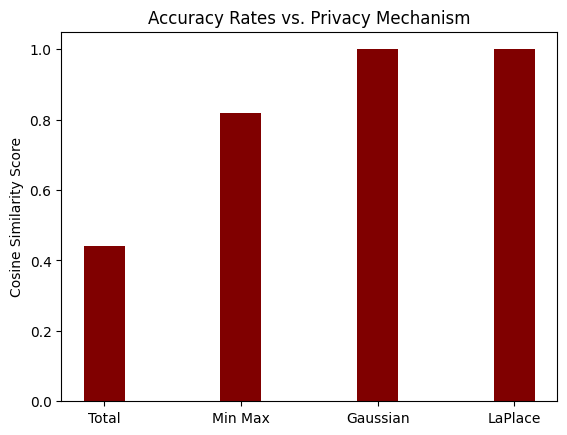

In [55]:
plt.bar(labels, scores, color ='maroon',
        width = 0.3)
plt.title("Accuracy Rates vs. Privacy Mechanism")
plt.ylabel("Cosine Similarity Score")